This notebook demonstrates the use of Python to explore a dataset containing offensive speech along with other attributes. Learning goals of this notebook - <br>
* Organize the data in Pandas dataframe, a key data structure of Python
* Provide some descriptive statistics about the dataset
* Prepare the comments containing offensive speeches for further texual analysis by removing stopwords, lowercasing, stemming, etc
* Use CountVectorizer module to convert the collection of speeches (or, tweets) into a matrix containing term or word frequencies in each tweet
* Calculate TF-IDF score of each term or word to determine the importance of that term in a specific tweet

Content Warning: The fetched dataset in this notebook contains hateful and harrassing comments which some may find offensive. 

Author: Saklain Zaman


In [ ]:
# Code Block 1
# URL of the dataset as csv file in github repo
url = "https://raw.githubusercontent.com/jmstanto/speechdata/main/Datasets/en_dataset.csv"

In [ ]:
# Code Block 2
import pandas as pd
import requests
import io

In [ ]:
# Code Block 3
# Read the csv file from url into a Pandas dataframe
df = pd.read_csv(url) 
print(df.head())

   HITId                                              tweet  \
0      1             call sis im boy girl still faggot shut   
1      2               @user @user legit nilas retarded idk   
2      3                                   said retard @url   
3      4  america another 8 years obama's ideology via h...   
4      5                @user don... fucking made cry twat.   

                                      sentiment directness  \
0                                     offensive   indirect   
1                       offensive_disrespectful   indirect   
2             fearful_abusive_offensive_hateful   indirect   
3  fearful_abusive_hateful_disrespectful_normal   indirect   
4                                     offensive   indirect   

                annotator_sentiment      target          group  
0                 confusion_disgust      origin            gay  
1                   anger_confusion  disability  special_needs  
2                 confusion_disgust  disability  spec

In the given code, the dataset is stored in a pandas dataframe, a rectangular data structure. Pandas provide various in-built capabilities for performing analytical tasks.

In [ ]:
# Code Block 4
df.shape  # This dataset has 5647 rows and 7 columns as different attributes

(5647, 7)

The pandas DataFrame has 5647 tweets for offensive speech detection. Other attributes of the comments are also stored in the DataFrame.



In [ ]:
# Code Block 5
tweets = df['tweet'] 
tweets # 5647 tweets 

0                  call sis im boy girl still faggot shut
1                    @user @user legit nilas retarded idk
2                                        said retard @url
3       america another 8 years obama's ideology via h...
4                     @user don... fucking made cry twat.
                              ...                        
5642                              @user @user retard :) x
5643    i'm hole sir i'm faggot sir i'm clit sir i'm h...
5644    (2/2) like fucking twat i'm damage heal you. r...
5645                              bf retarded guess u r 2
5646                   @user whats ching chong stuff mean
Name: tweet, Length: 5647, dtype: object

In [ ]:
# Code Block 6
list(df.columns) # The 7 columns contain the tweets and various attributes of the tweets

['HITId',
 'tweet',
 'sentiment',
 'directness',
 'annotator_sentiment',
 'target',
 'group']

In [ ]:
# Code Block 7
# Some descriptive statistics about the dataset
df.describe(include='all') 

,HITId,tweet,sentiment,directness,annotator_sentiment,target,group
count,5647.000000,5647,5647,5647,5647,5647,5647
unique,NaN,5593,48,2,71,6,16
top,NaN,@user retard,offensive,indirect,anger_disgust,origin,other
freq,NaN,5,2954,5078,557,2448,1590
mean,2824.000000,NaN,NaN,NaN,NaN,NaN,NaN
std,1630.292816,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1412.500000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2824.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,4235.500000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Code Block 8
# Count of the elements in a specific column
df['sentiment'].count()

5647

In [ ]:
# Code Block 9
# Count of distinct elements in different columns
df[['sentiment','target','group','annotator_sentiment']].nunique()

sentiment              48
target                  6
group                  16
annotator_sentiment    71
dtype: int64

For further texual analysis of the tweets, the tweets need to be cleaned, and then, converted into a **Document-Term Frequency Matrix**. In this step, from the comments, the stop words are removed, words are converted to lowercase, words are stemmed, and finally, a pandas dataframe will be generated containing term frequencies. <br>

In the dataframe, each row represent a document (or, tweet) and there are columns equal to total number of words in the vocabulary. This is generally a very sparse matrix as most of the words don't appear in a single document but there's a lot of words in the vocabulary.

**CountVectorizer** module from sklearn is used to create a document-term frequency matrix from the tweets. Each integer element in the matrix represent the frequency of the respective word in a specific document.

In [ ]:
# Code Block 10
# Import some important libraries 
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer

In [ ]:
# Code Block 11
# Import the list of stopwords
all_stopwords = text.ENGLISH_STOP_WORDS

# Create a stemmer object 
stemmer = PorterStemmer()

# Helper function for stemming 
analyzer = CountVectorizer().build_analyzer()
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc)) 

In [ ]:
# Code Block 12
# Create countvectorizer object  
# Supports preprocessing (lowercasing, removing stopwords, stemming) on raw data
vectorizer = CountVectorizer(lowercase=True, stop_words=all_stopwords, analyzer=stemmed_words) 

In [ ]:
# Code Block 13
# Create sparse DTM (Document-Term Matrix)
spDTM = vectorizer.fit_transform(df['tweet'])

# Store the DTM in pandas dataframe
spDTM = pd.DataFrame(spDTM.toarray())

# Set the column/feature names as document terms
spDTM.columns = vectorizer.get_feature_names_out()

In [ ]:
# Code Block 14
spDTM # Display the DTM for the collection of comments/tweets

,00,000000,0_______0,10,100,1000,100k,1024th,105,10649194697,...,zo,zoe,zog,zombi,zone,zoo,zorri,zumb,zyzz,zzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5642,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Code Block 15
spDTM.shape # The total vocabulary size should be 7838 and there's 5647 tweets in total

(5647, 7838)

In [ ]:
# Code Block 16
spDTM.info() # Some additional information about the datatype, count and memory usage

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5647 entries, 0 to 5646
Columns: 7838 entries, 00 to zzzz
dtypes: int64(7838)
memory usage: 337.7 MB


In [ ]:
# Code Block 17
# Get the list of vocabulary with their frequency from the vectorizer object
vocabulary_ = list(vectorizer.vocabulary_.keys())

In [ ]:
# Code Block 18
# Check the number of tokens in the vocabulary 
print(len(vocabulary_)) 

7838


In [ ]:
# Code Block 19
# Print the list of vocabulary
print(vocabulary_) 

['call', 'si', 'im', 'boy', 'girl', 'still', 'faggot', 'shut', 'user', 'legit', 'nila', 'retard', 'idk', 'said', 'url', 'america', 'anoth', 'year', 'obama', 'ideolog', 'via', 'hillari', 'we', 'well', 'way', 'shithol', 'countri', 'don', 'fuck', 'made', 'cri', 'twat', 'one', 'want', 'negro', 'swan', 'hahaha', 'trump', 'juul', 'ur', 'even', 'peopl', 'sad', 'canadian', 'never', 'met', 'seen', 'associ', 'person', 'current', 'label', 'plan', 'south', 'africa', 'come', 'keep', 'support', 'loud', 'mouth', 'poli', 'oprah', 'winfrey', 'sing', 'grow', 'michael', 'live', 'tell', 'caravan', 'respect', 'saturday', 'everyon', 'rememb', 'beer', 'liquor', 'sicker', 'man', 'dope', 'new', 'gospel', 'lighter', 'flick', 'soul', 'beat', 'win', 'fire', 'alreadi', 'mind', 'open', 'min', 'queue', 'make', 'feel', 'like', 'chanc', 'fcf', 'fucksak', 'mexican', 'spic', 'dora', 'shorti', 'caus', 'respond', 'lmfaoooo', 'ok', 'mayb', 'send', 'finish', 'cunt', 'embarrass', 'club', 'wow', 'watch', 'documentari', 'evid'

<b> Reducing the Number of Vocabulary/Features </b> <br>
In the document term matrix, we can reduce the vocabulary size by removing the columns for the terms rarely occurring in the collection of documents(tweets).

In [ ]:
# Code Block 20
# Removing the columns for the features(words) which occur less than 15 times across all documents
spDTMtrim = spDTM[spDTM.columns[spDTM.sum()>=15]] 
spDTMtrim


,10,3rd,absolut,account,act,actual,africa,african,ago,agre,...,wtf,ya,yall,ye,yeah,year,yet,yo,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5642,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5643,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5644,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5645,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Code Block 21
# A snippet of the term occurrences in different documents. 
# This matrix is sparse
spDTMtrim.iloc[225:235, 360:370]

,state,stay,still,stop,straight,stupid,suck,support,sure,swear
225,0,0,0,0,0,0,0,0,0,0
226,0,0,0,0,0,0,0,0,0,0
227,0,0,0,0,0,0,0,0,0,0
228,0,0,0,0,0,0,0,0,0,0
229,0,0,0,0,0,0,0,0,0,0
230,1,0,0,0,0,0,0,0,0,0
231,0,0,0,0,0,0,0,0,0,0
232,0,0,0,0,0,0,0,0,0,0
233,0,0,0,0,0,1,0,0,0,0
234,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Code Block 22
# Print the trimmed list of vocabulary
vocabulary_trimmed = spDTMtrim.columns # Extract the vocabulary from the columns/feature names


451 Index(['10', '3rd', 'absolut', 'account', 'act', 'actual', 'africa', 'african',
       'ago', 'agre', 'ain', 'alien', 'all', 'allow', 'alreadi', 'also',
       'alway', 'america', 'american', 'amp'],
      dtype='object')


In [ ]:
# Code Block 23
# After reducing the rare words, the size of vocabulary
len(vocabulary_trimmed)

451

In [ ]:
# Code Block 24
print(vocabulary_trimmed [0:20]) # First 20 terms in alphabetical order

Index(['10', '3rd', 'absolut', 'account', 'act', 'actual', 'africa', 'african',
       'ago', 'agre', 'ain', 'alien', 'all', 'allow', 'alreadi', 'also',
       'alway', 'america', 'american', 'amp'],
      dtype='object')


The terms present in the collection of document can be visually displayed as a wordcloud. <br>
The modules - **wordcloud** and **matplotlib** are used to demonstrate this visualization.

In [ ]:
# Code Block 25
# !pip install wordcloud
# !pip install matplotlib

In [ ]:
# Code Block 26
# Import wordcloud and matplotlib module to create and display a wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
# Code Block 27
# Append all the words in the vocabulary to match the input format of the wordcloud module
vocabulary = ' '.join(vocabulary_trimmed).lower()

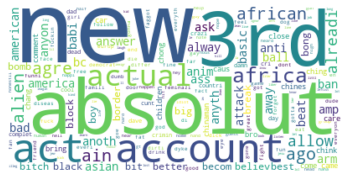

In [ ]:
# Code Block 28
# Create the wordcloud object
wordcloud = WordCloud(stopwords = all_stopwords,
                      collocations=True,
                      background_color='white'
                      ).generate(vocabulary)

# Plot the wordcloud object using matplotlib
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()


We want to understand how relevant a word is in a document or comment, considering the collection of documents. **TF-IDF (Term Frequency - Inverse Document Frequency)** is an approach to measure this. 

TF-IDF is the multiplication of two terms - TF and IDF. <br>
**TF** represents the frequency of a word or term in a document (or, comment). <br>
**IDF** is the logarithm of total number of documents divided by the number of documents containing the specific term plus 1. 

TF-IDF score helps to quantify the relevancy of a term or word in a collection of documents.

L2 normalization can be applied to calculated TF-IDF scores to scale the values. It scales the values in every row in such a way that if all the values in a row are squared and summed, the result will be 1.

Built-in model from sklearn is imported for calculating the TF-IDF scores.

In [ ]:
# Code Block 29
# Import model for TF-IDF calculation from sklearn
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
# Code Block 30
# Get TfidfTransformer model with L2 normalization
tfidf_transformer = TfidfTransformer(norm='l2') 

# Use the DTM as input to the TfidfTransformer model
sp_tf_idf = tfidf_transformer.fit_transform(spDTMtrim) 

# Convert the generated tf-idf matrix to pandas dataframe
sp_tf_idf = pd.DataFrame(sp_tf_idf.toarray()) 

# Use the features(words) as the column names of the tf-idf matrix
sp_tf_idf.columns = tfidf_transformer.get_feature_names_out() 

print(sp_tf_idf.shape)

sp_tf_idf.iloc[225:235, 360:370]

(5647, 451)


,state,stay,still,stop,straight,stupid,suck,support,sure,swear
225,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
226,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
227,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
228,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
229,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
230,0.404908,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
231,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
232,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
233,0.000000,0.0,0.0,0.0,0.0,0.698172,0.0,0.0,0.000000,0.0
234,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.644338,0.0


In [ ]:
# Code Block 31
print("Tf-idf matrix using TfidfTransformer:\n")
print(round(sp_tf_idf.iloc[225:235, 360:370],2))

Tf-idf matrix using TfidfTransformer:

     state  stay  still  stop  straight  stupid  suck  support  sure  swear
225    0.0   0.0    0.0   0.0       0.0     0.0   0.0      0.0  0.00    0.0
226    0.0   0.0    0.0   0.0       0.0     0.0   0.0      0.0  0.00    0.0
227    0.0   0.0    0.0   0.0       0.0     0.0   0.0      0.0  0.00    0.0
228    0.0   0.0    0.0   0.0       0.0     0.0   0.0      0.0  0.00    0.0
229    0.0   0.0    0.0   0.0       0.0     0.0   0.0      0.0  0.00    0.0
230    0.4   0.0    0.0   0.0       0.0     0.0   0.0      0.0  0.00    0.0
231    0.0   0.0    0.0   0.0       0.0     0.0   0.0      0.0  0.00    0.0
232    0.0   0.0    0.0   0.0       0.0     0.0   0.0      0.0  0.00    0.0
233    0.0   0.0    0.0   0.0       0.0     0.7   0.0      0.0  0.00    0.0
234    0.0   0.0    0.0   0.0       0.0     0.0   0.0      0.0  0.64    0.0


In [ ]:
# Code Block 32
print("Actual word frequency for comparison:\n")
print(spDTMtrim.iloc[225:235, 360:370])

Actual word frequency for comparison:

     state  stay  still  stop  straight  stupid  suck  support  sure  swear
225      0     0      0     0         0       0     0        0     0      0
226      0     0      0     0         0       0     0        0     0      0
227      0     0      0     0         0       0     0        0     0      0
228      0     0      0     0         0       0     0        0     0      0
229      0     0      0     0         0       0     0        0     0      0
230      1     0      0     0         0       0     0        0     0      0
231      0     0      0     0         0       0     0        0     0      0
232      0     0      0     0         0       0     0        0     0      0
233      0     0      0     0         0       1     0        0     0      0
234      0     0      0     0         0       0     0        0     1      0
